In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image

### 从文件加载数据

In [2]:
# 读取 CSV 文件
def readImage(image_path, file_path):
    csv_file = pd.read_csv(file_path)
    # 获取列数据
    train_data_file = csv_file['train']
    train_data_label = csv_file['train_label']
    test_data_file = csv_file['test']
    test_data_label = csv_file['test_label']
    x, y_ , t, yt_= [], [], [], []
    for _index in np.arange(0, train_data_file.shape[0], 1):
        if pd.notna(train_data_file.iloc[_index]):  # 判断如果数据非空
            img_ = Image.open(image_path + train_data_file[_index])
            img_ = np.array(img_.convert('L'))
            img_ = img_ / 255.  # 数据标准归一化
            x.append(img_)
            y_.append(train_data_label[_index])
    for _index in np.arange(0, test_data_file.shape[0], 1):
        if pd.notna(test_data_file.iloc[_index]):
            img_ = Image.open(image_path + test_data_file[_index])
            img_ = np.array(img_.convert('L'))
            img_ = img_ / 255.
            t.append(img_)
            yt_.append(test_data_label[_index])
    return (x, y_), (t, yt_)

(train_img, train_lab), (test_img, test_lab)  = readImage(image_path='../Data/MNIST/', file_path='../Data/MNIST/file_name.csv')

### 读取标准数据集

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='E:\Code\myMachineLearning\Tensorflow2\Data\mnist.npz')
x_train, x_test = x_train/255.0, x_test/255.0

print('训练集样本的大小:', x_train.shape)
print('训练集标签的大小:', y_train.shape)
print('测试集样本的大小:', x_test.shape)
print('测试集标签的大小:', y_test.shape)

训练集样本的大小: (60000, 28, 28)
训练集标签的大小: (60000,)
测试集样本的大小: (10000, 28, 28)
测试集标签的大小: (10000,)


### 数据扩充与打包工具，数据增强
```
img_prossess_Gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale='所有数据乘以这个数（倍乘）',
    horizontal_flip='是否随机水平旋转 Boolean',
    rotation_rang='随机旋转的角度范围 Int',
    width_shift_range='随机宽度偏移量',
    height_shift_range='随机高度便宜量',
    zoom_range='随机缩放的范围 Float or [lower, upper].'
)
```

In [ ]:
img_prossess_Gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./1.,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    zoom_range=0.5
)
img_prossess_Gen.fit(train_img)

### 显示数据

In [ ]:
# 显示出一张灰度图片看看
im = x_train[1]
im = im.reshape(-1, 28)
plt.imshow(im,cmap='Greys')
plt.show()

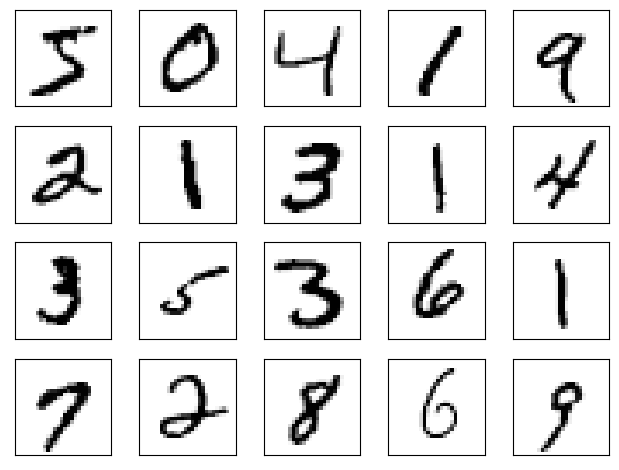

In [10]:
#可视化样本，下面是输出了训练集中前20个样本
fig, ax = plt.subplots(nrows=4,ncols=5,sharex='all',sharey='all')
ax = ax.flatten()
for i in range(20):
    img = x_train[i].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Sequential构建

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
### 独立class构建

In [3]:
class mnisModel(Model):
    def __init__(self, *args, **kwargs):
        super(mnisModel, self).__init__(*args, **kwargs)

        self.flatten1=layers.Flatten()
        self.d1=layers.Dense(128, activation=tf.keras.activations.relu)
        self.d2=layers.Dense(10, activation=tf.keras.activations.softmax)

    def call(self, input):
        x = self.flatten1(input)
        x = self.d1(x)
        x = self.d2(x)
        return(x)

model = mnisModel()

### 添加过程记录回调函数

In [9]:
# 定义保存和记录数据的回调器
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="./checkpoint/mnist/mnist.ckpt",
                                                 save_weights_only=True,
                                                 save_best_only=True)
# 设置TensorBoard输出的回调函数
tfbd_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs/mnist/")

In [10]:
model.compile(optimizer='adam',     # 'adam'  tf.keras.optimizers.Adam(learning_rate=0.4 , beta_1=0.9, beta_2=0.999)
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                        metrics=['sparse_categorical_accuracy'])

history =model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data = (x_test, y_test), validation_freq=1, callbacks=[cp_callback, tfbd_callback])
model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0152 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0797 - val_sparse_categorical_accuracy: 0.9794
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0104 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0902 - val_sparse_categorical_accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0106 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0915 - val_sparse_categorical_accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0874 - val_sparse_categorical_accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0986 - val_sparse_categorical_accuracy: 0.9787
Model: "mnis_model"
_________________________________________________________________
Layer (ty

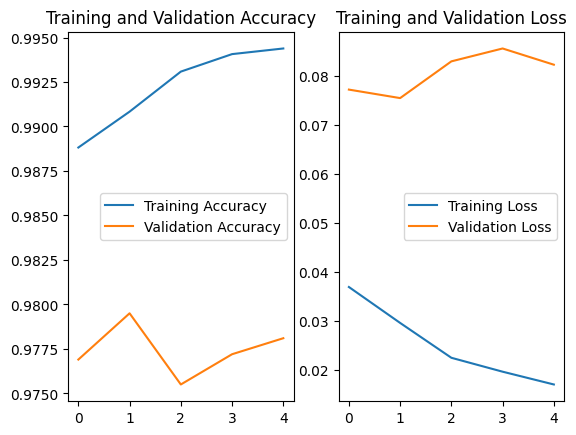

In [8]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 加载模型，执行前向传播，进行一次新推理

In [14]:
model_path = './checkpoint/mnist/mnist.ckpt'
image_path = 'E:/Code/myMachineLearning/Tensorflow2/Data/MNIST/'

new_model = mnisModel()
new_model.load_weights(model_path)

preNum = int(input("place input how many jpg file while be test:"))
for i in range(preNum):
    imgNum = int(input("place input png name:"))
    img_path = image_path+str(imgNum)+'.png'
    print("read image:{}".format(img_path))

    img_ = Image.open(img_path)
    img_ = img_.resize((28, 28), Image.ANTIALIAS)
    img_ = np.array(img_.convert('L'))
    img_ = 255 - img_
    img_ = img_/255.

    x_predict = img_[tf.newaxis, ...]
    result = model.predict(x_predict)
    predNum = tf.argmax(result, axis=1)
    print("predice num is: ")
    tf.print(predNum)


read image:E:/Code/myMachineLearning/Tensorflow2/Data/MNIST/1.png


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

In [4]:
import cv2
# 1. 加载图像
model_path = './checkpoint/mnist/mnist.ckpt'
image_path = '../Data/MNIST/'

new_model = mnisModel()
new_model.load_weights(model_path)

preNum = int(input("place input how many jpg file while be test:"))
for i in range(preNum):
    imgNum = int(input("place input png name:"))
    img_path = image_path+str(imgNum)+'.png'
    print("read image:{}".format(img_path))

    img_ = cv2.imread(img_path)
    resized_img = cv2.resize(img_, (28, 28), interpolation=cv2.INTER_AREA)
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    # 4. 准备图像数据，进行归一化和添加批次维度
    cv2.imshow("input num", img_)
    img_for_prediction = gray_img.astype(np.float32) / 255.0  # 归一化到 [0, 1]
    img_for_prediction = np.expand_dims(img_for_prediction, axis=0)  # 添加批次维度

    result = model.predict(img_for_prediction)
    predNum = tf.argmax(result, axis=1)
    print("predice num is: ")
    tf.print(predNum)

read image:../Data/MNIST/2.png
predice num is: 
[1]
read image:../Data/MNIST/1.png
predice num is: 
[1]
read image:../Data/MNIST/4.png
predice num is: 
[1]
